In [1]:
import pandas as pd
from astropy.io import fits
import astropy
import astropy.constants as c
import numpy as np
import pandas as pd
from sncosmo import read_snana_fits
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares

from elasticc_for_etienne import *

In [2]:
head = '/media/ELAsTICC/data/training_sample/ELASTICC_TRAIN_SNIa-91bg/ELASTICC_TRAIN_NONIaMODEL0-0001_HEAD.FITS.gz'
phot = '/media/ELAsTICC/data/training_sample/ELASTICC_TRAIN_SNIa-91bg/ELASTICC_TRAIN_NONIaMODEL0-0001_PHOT.FITS.gz'
lcs = read_snana_fits(head, phot)

## Find the winnner

In [5]:
sizes = []

for i in lcs:
    sizes.append(len(i['PHOTFLAG'][i['PHOTFLAG']!=0]))
    
rows = np.arange(0, len(lcs))
order_sizes, order_rows = zip(*sorted(zip(sizes, rows), reverse=True))

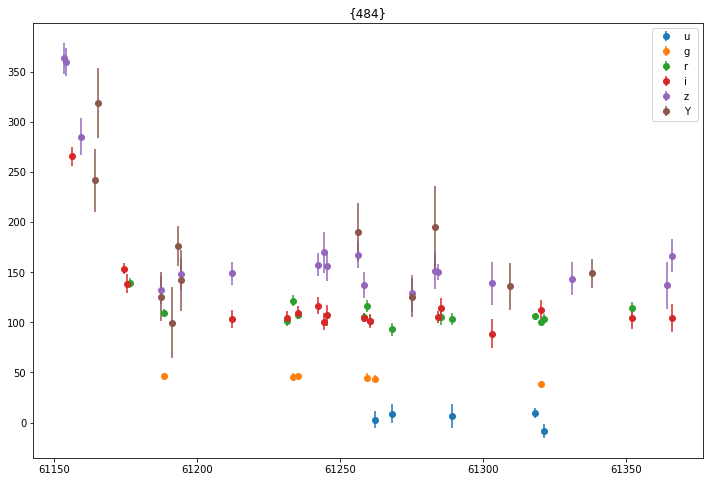

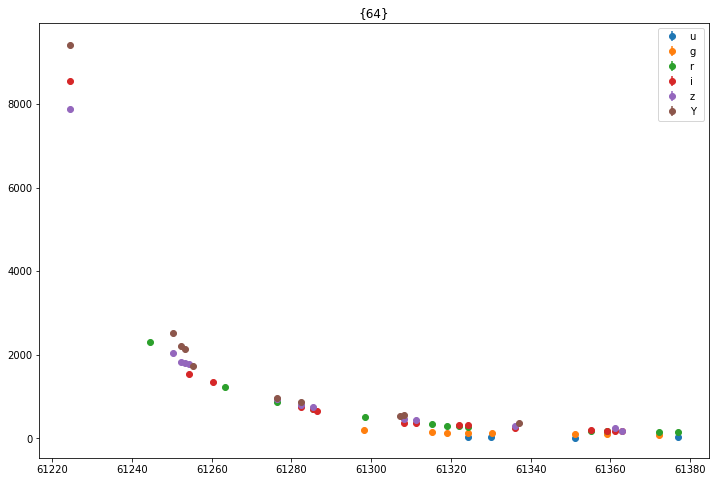

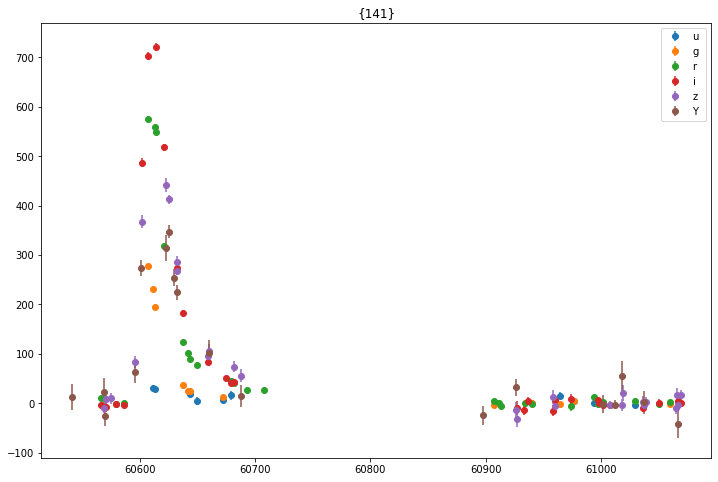

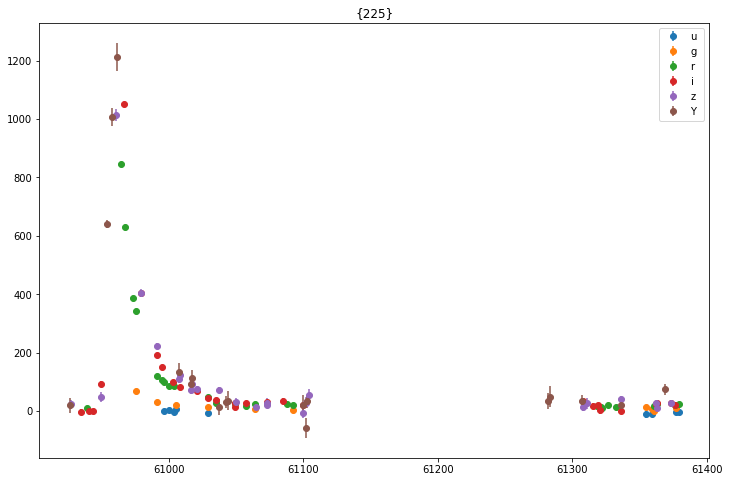

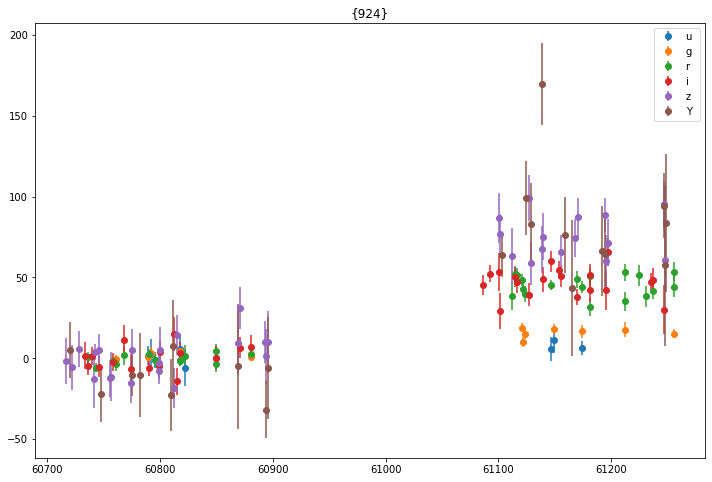

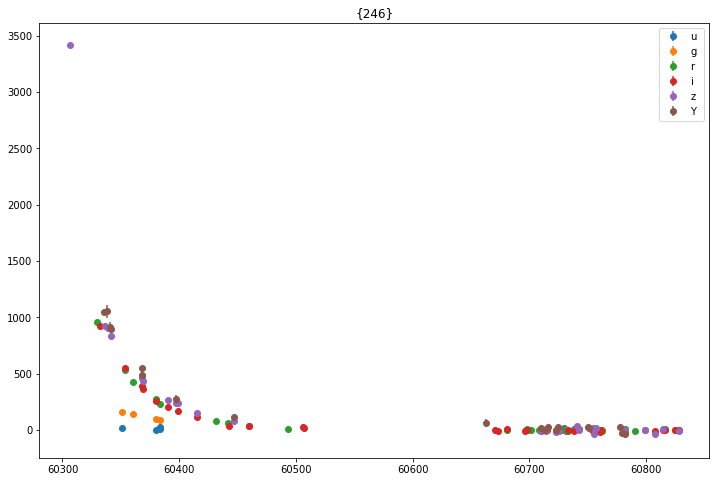

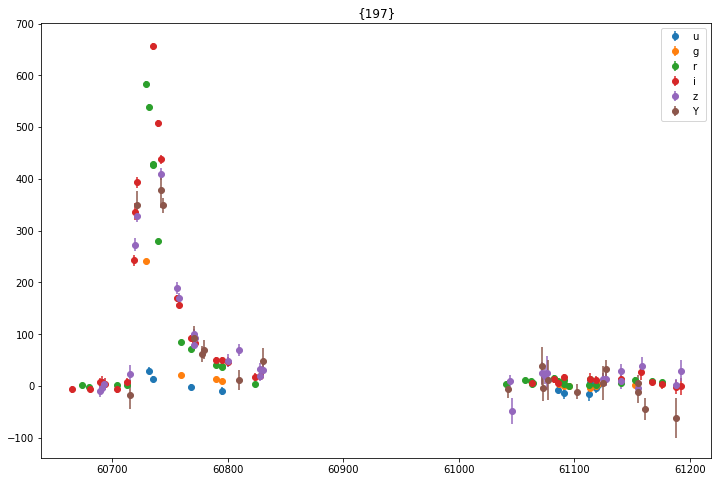

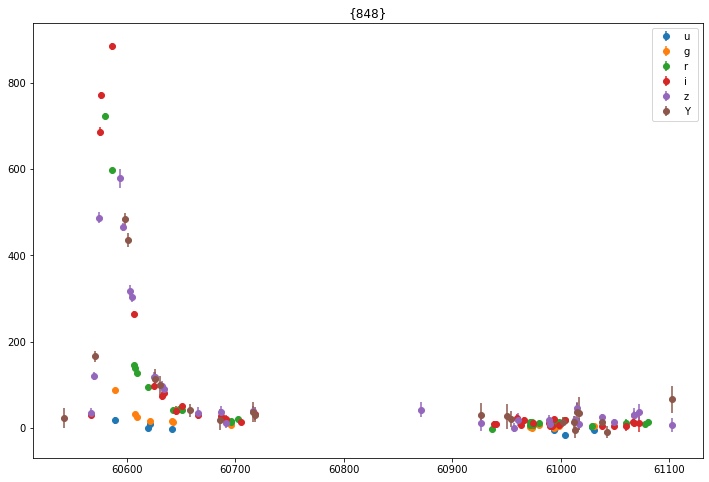

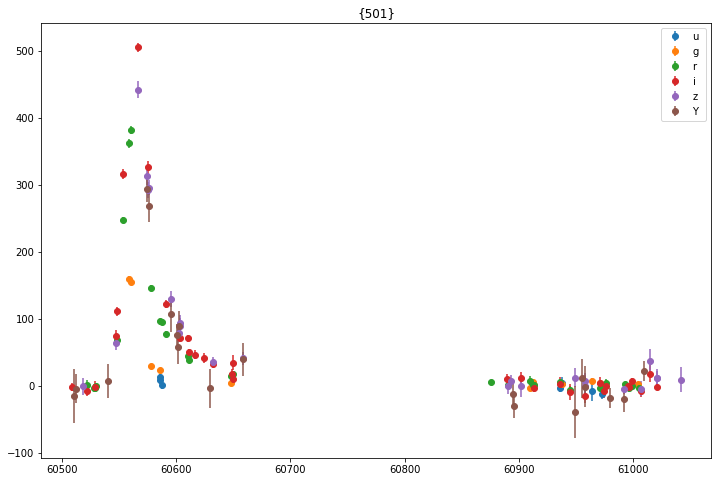

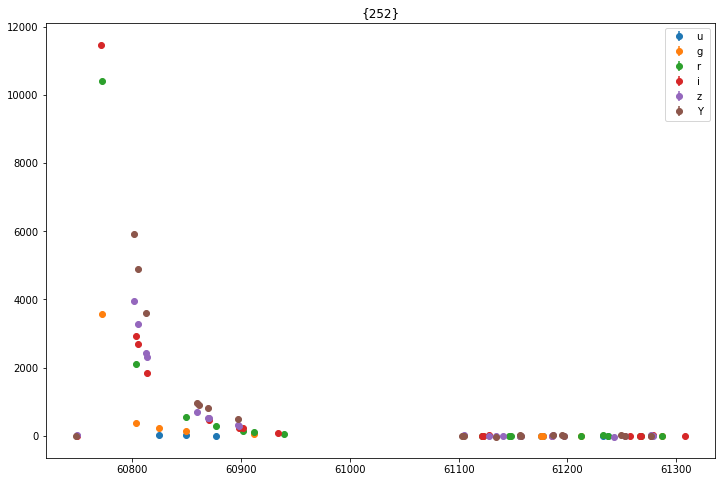

In [6]:
batch = 0
batch_size = 10

for obj in order_rows[batch*batch_size : batch*batch_size + batch_size]:
    
    plt.figure(figsize = (12, 8))
    
    for band in ['u ','g ','r ','i ','z ','Y ']:

        
        single = lcs[obj]#[lcs[obj]['PHOTFLAG']!=0]
        
        single_band = single[single['BAND'] == band]
        flux = single_band['FLUXCAL']
        fluxerr = single_band['FLUXCALERR']
        mjd = single_band['MJD']

        plt.errorbar(mjd, flux, yerr=fluxerr, fmt='o', label = band)
        plt.title({obj})
    
        plt.legend()

In [7]:
winner = 141

/media3/etienne/workdir/spark_AGN/ELAsTiCC/Multiple_band_fit/SNAD/elasticc_for_etienne.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(t - t0) / tfall) / (1 + np.exp((t - t0) / trise))
/media3/etienne/workdir/spark_AGN/ELAsTiCC/Multiple_band_fit/SNAD/elasticc_for_etienne.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(t - t0) / tfall) / (1 + np.exp((t - t0) / trise))


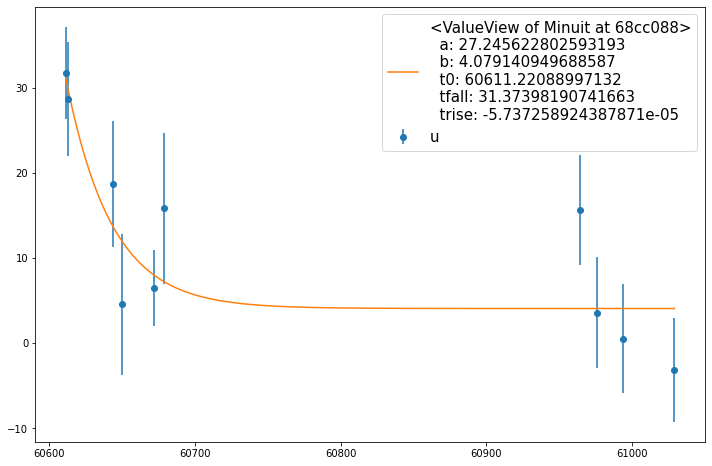

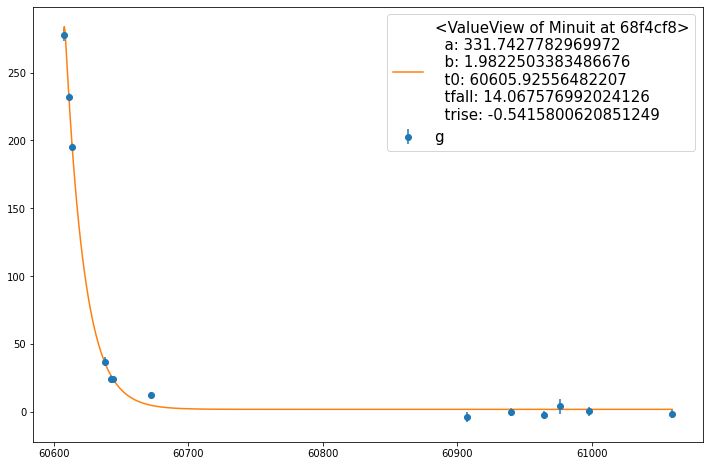

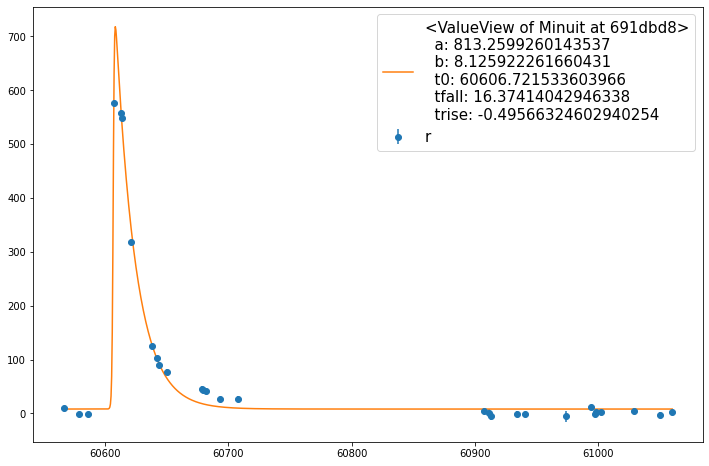

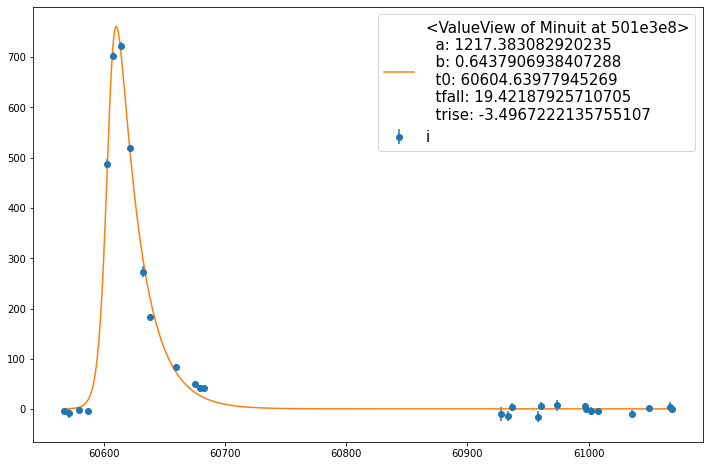

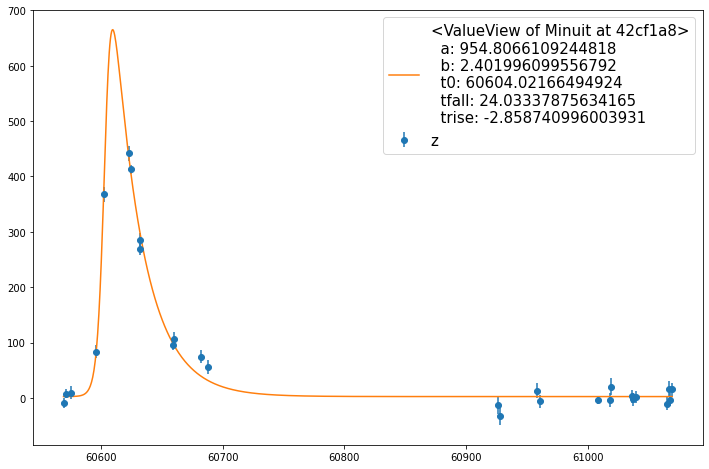

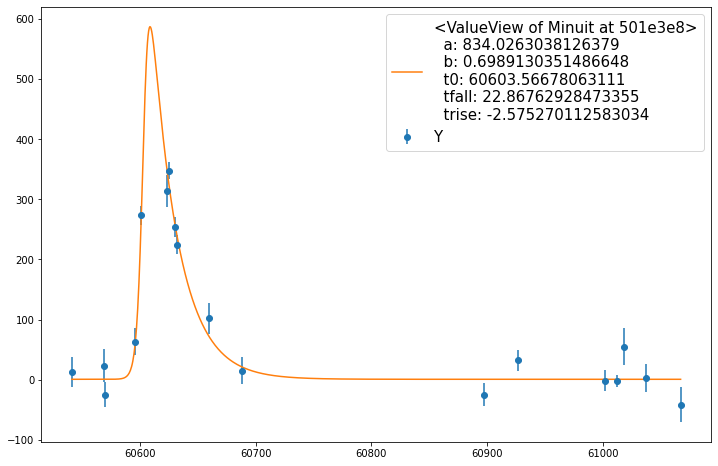

In [13]:
for band in ['u ','g ','r ','i ','z ','Y ']:

    plt.figure(figsize = (12, 8))
    obj = lcs[winner]

    single_band = obj[obj['BAND'] == band]
    flux = single_band['FLUXCAL']
    fluxerr = single_band['FLUXCALERR']
    mjd = single_band['MJD']
    
    x = np.linspace(mjd.min(), mjd.max(), 1000)
        
    parameters_dict = {"a": flux.max(), "b":0, "t0": mjd[np.argmax(flux)], "tfall": 30, "trise":-5}
    least_squares = LeastSquares(mjd, flux, fluxerr, FbazB)
        
    fit = Minuit(least_squares, **parameters_dict)
    fit.migrad()
    
    

    plt.errorbar(mjd, flux, yerr=fluxerr, fmt='o', label = band)
        
    plt.plot(x, FbazB(x, **fit.values), label=fit.values)
    
    plt.legend(fontsize = 15)

# Create the bolometric flux function (that depends on time and frequency) :

The fit will therefore be in 3D

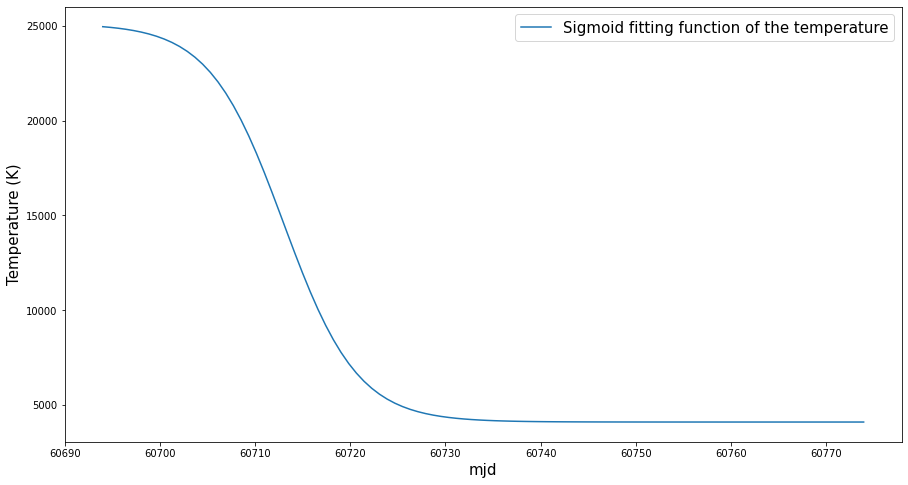

In [16]:
Tmin, Tmax, ksig, tT, t0 = 4.111e3, 21e3, 3.9, -11, 60.72397e3 

x_step = np.linspace(t0-30, t0+50, 100)
plt.figure(figsize = (15, 8))
plt.plot(x_step, Tsig(x_step, Tmin, Tmax, ksig, t0, tT), label='Sigmoid fitting function of the temperature')
plt.xlabel('mjd',fontsize = 15)
plt.ylabel('Temperature (K)',fontsize = 15)
plt.legend(fontsize = 15)

In [17]:
snia = lcs[winner]

nu_u = Am_to_Hz(3751.36)
nu_g = Am_to_Hz(4741.64)
nu_r = Am_to_Hz(6173.23)
nu_i = Am_to_Hz(7501.62)
nu_z = Am_to_Hz(8679.19)
nu_Y = Am_to_Hz(9711.53)
freq_dic = {'u ':nu_u, 'g ':nu_g, 'r ':nu_r, 'i ':nu_i, 'z ':nu_z, 'Y ':nu_Y}
snia['NU'] = np.vectorize(freq_dic.get)(list(snia['BAND']))


In [22]:
flux = snia['FLUXCAL']
fluxerr = snia['FLUXCALERR']
nu = snia['NU']
mjd = snia['MJD']
freq = snia['NU']


parameters_dict = {"a": flux.max(), "t0": mjd[np.argmax(flux)], "tT": 0,\
                   "tfall": 30, "trise":-5, "Tmin":4000, "dT":3000, "ksig":4}


#boundaries = {}

least_squares = LeastSquares(np.array([mjd, nu]).T, flux, fluxerr, Fnu)

fit = Minuit(least_squares,
             limit_Tmin=(1000, 50000),
             limit_dT=(0, 100000),
             limit_a=(0, 100000),
             **parameters_dict)

fit.migrad()
#print(fit.FCN)

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1559                       │        Nfcn = 954 (954 total)        │
│ EDM = 9.65e-05 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a     │    712    │     8     │            │            │    0    │ 100000  │       │
│ 1 │ t0    │60.60491e3 │ 0.00014e3 │            │            │         │         │       │
│ 2 │ tT    │   -3.0    │    1.3    │            │            │         │         │       │
│ 3 │ tfall │   16.72   │   0.21    │            │            │         │         │       │
│ 4 │ trise │   -3.16   │   0.12    │            │            │         │         │       │
│ 5 │ Tmin  │  4.320e3  │  0.019e3  │            │            │  1000   │  50000  │       │
│ 6 │ dT    │   4.5e3   │   1.6e3   │            │            │    0    │ 100000  │       │
│ 7 │ ksig  │   2.15    │   0.24    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

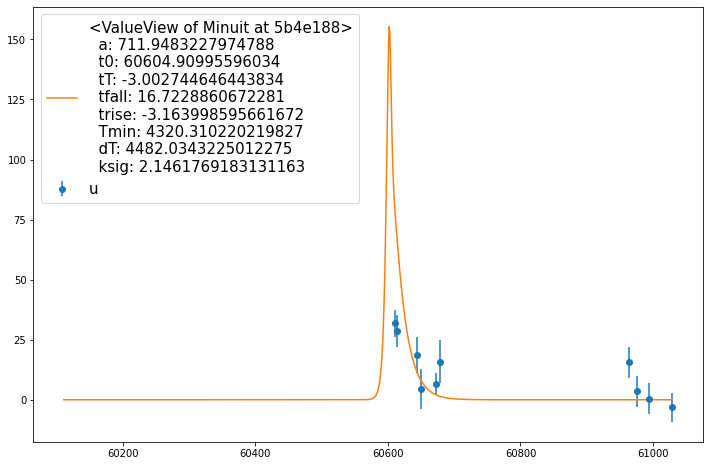

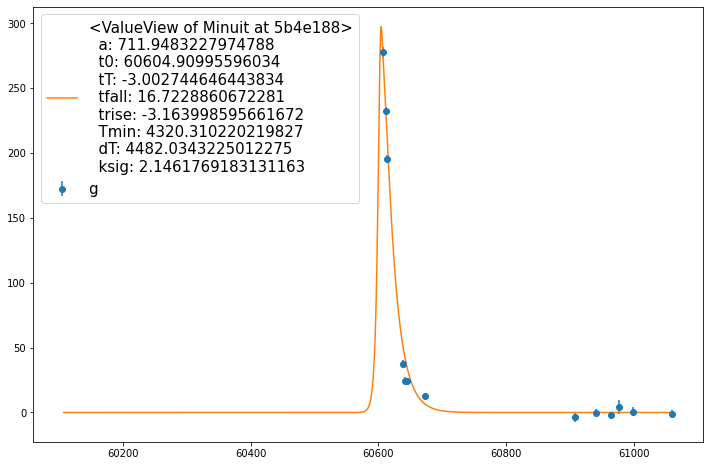

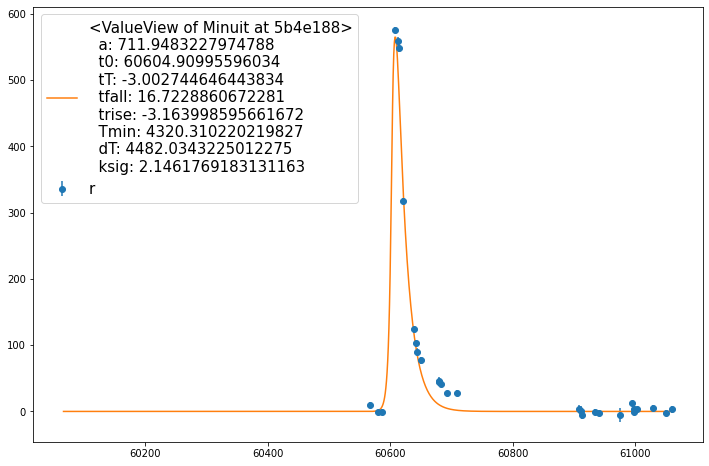

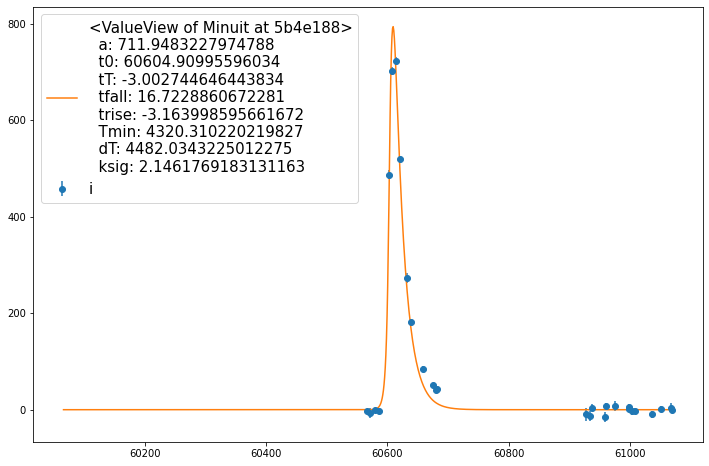

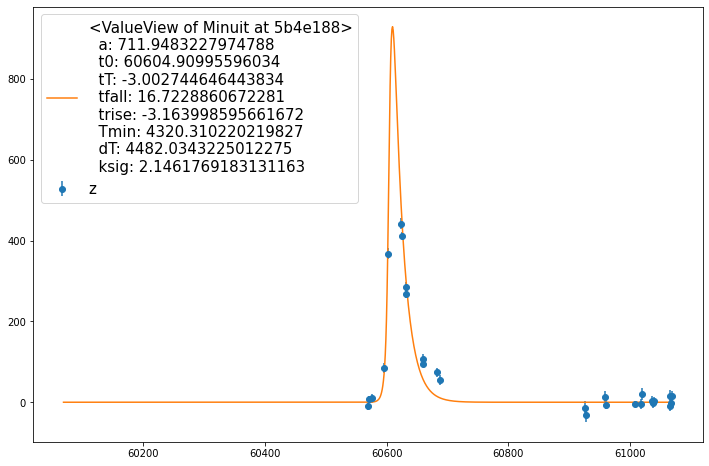

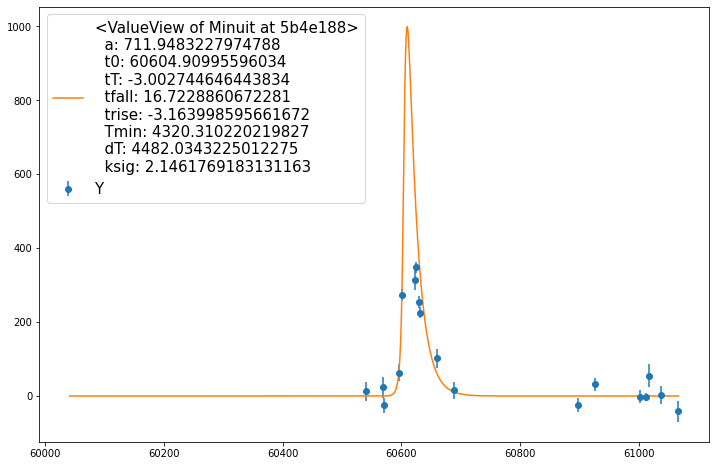

In [23]:
for band in ['u ','g ','r ','i ','z ','Y ']:

    plt.figure(figsize = (12, 8))
    obj = lcs[winner]

    single_band = obj[obj['BAND'] == band]
    flux = single_band['FLUXCAL']
    fluxerr = single_band['FLUXCALERR']
    mjd = single_band['MJD']

    xtime = np.linspace(mjd.min()-500, mjd.max(), 1000)
    x = np.array([xtime,[freq_dic.get(band)]*len(xtime)]).T

    plt.errorbar(mjd, flux, yerr=fluxerr, fmt='o', label = band)

    plt.plot(xtime, Fnu(x, **fit.values), label=fit.values)

    plt.legend(fontsize = 15)

In [130]:
import random

noise = []
for i in range(9):
    noise.append(random.random()-random.random())
noise = np.array(noise) * 1
    
a = np.array([1,2,3,4,5,6,7,8,9])
x = 1*a + 0
a = a + noise

def func(x, p1, p2):
    return p1*x + p2


least_squares = LeastSquares(x, a, noise, func)


parameters_dict = {"p1": 42, 'p2':42}

fit = Minuit(least_squares, **parameters_dict)


fit.migrad()


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 37.46                      │         Nfcn = 36 (36 total)         │
│ EDM = 1.79e-16 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p1   │  0.9860   │  0.0013   │            │            │         │         │       │
│ 1 │ p2   │   0.086   │   0.007   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

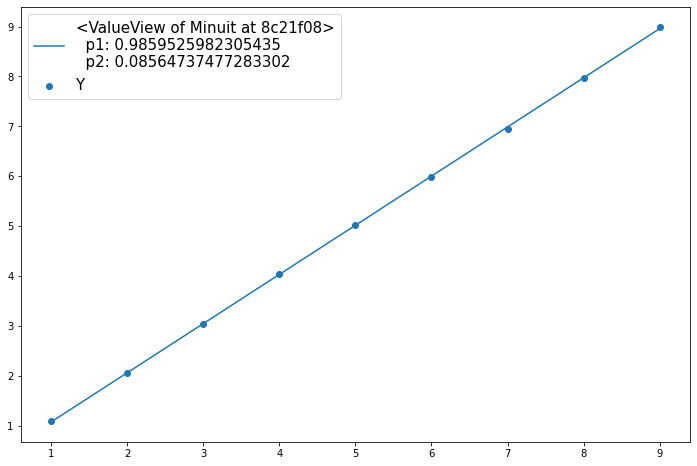

In [132]:
plt.figure(figsize = (12, 8))

xtime = np.linspace(x.min(), x.max(), 1000)

plt.scatter(x, a, label = band)

plt.plot(xtime, func(xtime, **fit.values), label=fit.values)

plt.legend(fontsize = 15)